# Seaborn

[seaborn](https://github.com/mwaskom/seaborn)是一个基于matplotlib的python可视化库。提供了绘制统计图形的高级接口。也是一个使用者很多的可视化库。

## 安装

需要的库有：

- numpy
- scipy
- pandas
- matplotlib
- statsmodels

所以以上库都安装下。

```bash
python -m pip install --user numpy scipy matplotlib ipython jupyter pandas sympy nose

conda install statsmodels
```

然后安装seaborn

```bash
pip install seaborn
```

## 简介

文档参考：[seaborn: statistical data visualization](https://seaborn.pydata.org/)

seaborn和pandas也结合的很好，基于matplotlib绘制。主要功能有：

- 检验多变量之间的关系
- 对类别变量统计的特别支持
- 单变量和二元变量的可视化，以及数据集内比较它们
- 线性回归模型可视化
- 复杂数据集整体结构可视化
- 复杂多图的高级抽象
- 内置主题轻松配置图形
- 调色板工具

In [5]:
# Pandas for managing datasets
import pandas as pd

In [6]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
# Seaborn for plotting and styling
import seaborn as sns

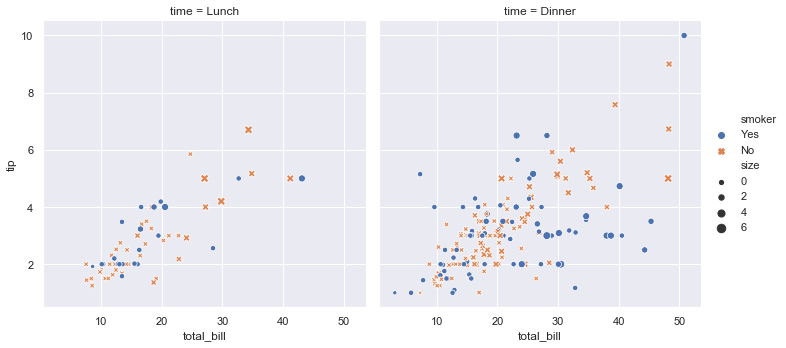

In [8]:
sns.set()
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips);

sns.set()表示使用那个默认的seaborn主题。